# BibRec: Training Random Forest Model

### Evaluation API: Predict top rated books for given User with imported model
Input for the model is a list of top rated books along with the user information

In [1]:
from bibrec.server.Utils import *

books, users, ratings = get_normalized_data(books_path='data/BX-Books.csv',
                                            users_path='data/BX-Users.csv',
                                            ratings_path='data/BX-Book-Ratings.csv')
books = books.drop(["isbn"], axis=1)
ratings = ratings.drop(["isbn"], axis=1)

/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=";", encoding="latin-1")
/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:94: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [2]:
# limit data to top-rated books only
top_ratings = ratings.groupby('isbn13').user_id.count().sort_values(ascending=False)
top_ratings = top_ratings[:100]
top_ratings = top_ratings.reset_index()
# user_id => nr of ratings
top_ratings = top_ratings.drop('user_id', axis=1)
top_ratings

,isbn13
0,9780316666343
1,9780971880108
2,9780385504201
3,9780312195519
4,9780060928339
...,...
95,978074323719
96,9780439064866
97,978044660899
98,978038550582


In [3]:
explicit_ratings = ratings[ratings.book_rating != 0]
top_ratings = top_ratings.merge(explicit_ratings, on='isbn13', how='inner')
top_ratings

,isbn13,normalized_rating,user_id,book_rating
0,9780316666343,1.000000,277439,7
1,9780316666343,1.000000,277752,7
2,9780316666343,1.000000,278633,9
3,9780316666343,1.000000,638,10
4,9780316666343,1.000000,709,3
...,...,...,...,...
4391748,9780553572995,-1.891304,274004,9
4391749,9780553572995,-1.891304,274692,7
4391750,9780553572995,-1.891304,275519,8
4391751,9780553572995,-1.891304,276203,10


In [4]:
filtered_books = books[books.isbn13.isin(top_ratings.isbn13)]
filtered_books

,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
18,The Testament,John Grisham,1999,other,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,9780440234746,7.694118,170.0,6
26,Wild Animus,Rich Shapero,2004,other,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,9780971880108,4.390706,581.0,1
28,Timeline,MICHAEL CRICHTON,2000,ballantine_books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,9780345417626,7.851282,195.0,5
37,To Kill a Mockingbird,Harper Lee,1988,other,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,9780446310789,8.943925,214.0,17
52,The Street Lawyer,JOHN GRISHAM,1999,other,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,9780440225706,7.624060,133.0,6
...,...,...,...,...,...,...,...,...,...,...,...
5545,The Chamber,John Grisham,1995,other,http://images.amazon.com/images/P/0440220602.0...,http://images.amazon.com/images/P/0440220602.0...,http://images.amazon.com/images/P/0440220602.0...,9780440220602,7.431507,146.0,10
5607,A Walk to Remember,Nicholas Sparks,2000,warner_books,http://images.amazon.com/images/P/0446608955.0...,http://images.amazon.com/images/P/0446608955.0...,http://images.amazon.com/images/P/0446608955.0...,978044660899,7.854839,124.0,5
5662,The Summons,John Grisham,2002,other,http://images.amazon.com/images/P/0440241073.0...,http://images.amazon.com/images/P/0440241073.0...,http://images.amazon.com/images/P/0440241073.0...,9780440241072,7.285000,200.0,3
6329,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,9780439136365,9.082707,133.0,4


In [5]:
encoded_books = hot_encode_books(filtered_books)
df_books = encoded_books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
df_books

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
18,9780440234746,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26,9780971880108,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28,9780345417626,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,9780446310789,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
52,9780440225706,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,9780440220602,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5607,978044660899,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5662,9780440241072,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6329,9780439136365,4,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_user = pd.DataFrame([{
    'age': 20,
    'city': None,
    'state': None,
    'country': "something"
}])
df_user = normalize_country(df_user, users.country)
df_user = normalize_state(df_user)
df_user = hot_encode_users(df_user)
df_user = df_user.filter(regex="age|country_|state_", axis=1)
df_user

,age,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,country_australia,country_italy,country_france,country_portugal,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
df_input = df_books.assign(**df_user.iloc[0])
df_input

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
18,9780440234746,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26,9780971880108,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28,9780345417626,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37,9780446310789,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
52,9780440225706,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,9780440220602,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5607,978044660899,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5662,9780440241072,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6329,9780439136365,4,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
from os.path import exists
import pickle

# Load the model from the file
model_file = "rf5.pkl"

if not exists(model_file):
    exit("No model found")

print("Loading file:", model_file)
with open(model_file, "rb") as file:
    rfc = pickle.load(file)


Loading file: rf5.pkl


In [9]:
rfc_predict = rfc.predict(df_input)
pd.DataFrame(rfc_predict)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


,0
0,10
1,3
2,6
3,7
4,10
...,...
95,9
96,10
97,8
98,10


<AxesSubplot: ylabel='count'>

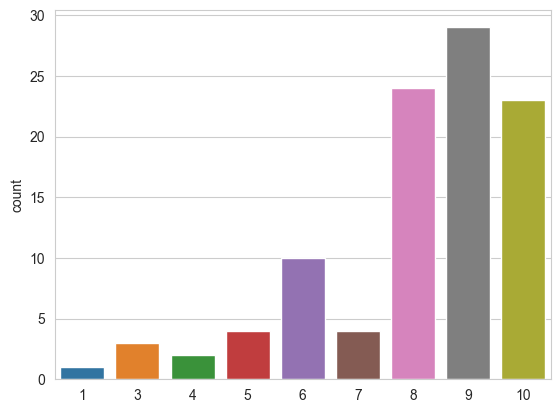

In [10]:
import seaborn as sns
sns.countplot(x = rfc_predict)

In [11]:
predictions = df_books.filter(regex="isbn13", axis=1)
predictions = predictions.reset_index()
predicted_ratings = pd.DataFrame(rfc_predict, columns=["predicted_book_rating"])
predictions = predictions.join(predicted_ratings)
predictions

,index,isbn13,predicted_book_rating
0,18,9780440234746,10
1,26,9780971880108,3
2,28,9780345417626,6
3,37,9780446310789,7
4,52,9780440225706,10
...,...,...,...
95,5545,9780440220602,9
96,5607,978044660899,10
97,5662,9780440241072,8
98,6329,9780439136365,10


In [12]:
predictions = predictions.sort_values("predicted_book_rating", na_position="first", ascending=False)
predictions

,index,isbn13,predicted_book_rating
0,18,9780440234746,10
86,4578,9780684872155,10
53,1680,9780440226437,10
32,953,9780440211723,10
62,2143,9780590353427,10
...,...,...,...
51,1553,9780375725784,4
1,26,9780971880108,3
68,2602,9780446605236,3
83,4180,9780446516525,3


In [13]:
predictions.merge(books, on="isbn13", how="left")

,index,isbn13,predicted_book_rating,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,rating_mean,rating_count,normalized_year_of_publication
0,18,9780440234746,10,The Testament,John Grisham,1999,other,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,7.694118,170.0,6
1,4578,9780684872155,10,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,other,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...,8.000000,136.0,6
2,1680,9780440226437,10,Summer Sisters,Judy Blume,1999,other,http://images.amazon.com/images/P/0440226430.0...,http://images.amazon.com/images/P/0440226430.0...,http://images.amazon.com/images/P/0440226430.0...,7.556075,214.0,6
3,953,9780440211723,10,A Time to Kill,JOHN GRISHAM,1992,other,http://images.amazon.com/images/P/0440211727.0...,http://images.amazon.com/images/P/0440211727.0...,http://images.amazon.com/images/P/0440211727.0...,7.932990,194.0,13
4,2143,9780590353427,10,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,other,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,8.936508,315.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1553,9780375725784,4,A Heartbreaking Work of Staggering Genius,Dave Eggers,2001,other,http://images.amazon.com/images/P/0375725784.0...,http://images.amazon.com/images/P/0375725784.0...,http://images.amazon.com/images/P/0375725784.0...,7.180556,144.0,4
96,26,9780971880108,3,Wild Animus,Rich Shapero,2004,other,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,4.390706,581.0,1
97,2602,9780446605236,3,The Notebook,Nicholas Sparks,1998,warner_books,http://images.amazon.com/images/P/0446605239.0...,http://images.amazon.com/images/P/0446605239.0...,http://images.amazon.com/images/P/0446605239.0...,7.689320,206.0,7
98,4180,9780446516525,3,The Bridges of Madison County,Robert James Waller,1992,warner_books,http://images.amazon.com/images/P/044651652X.0...,http://images.amazon.com/images/P/044651652X.0...,http://images.amazon.com/images/P/044651652X.0...,7.506579,152.0,13
